# Building a Machine learning model using Clustering for Customer segmenation


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\07. Clustering\EastWestAirlines.csv")

In [55]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Exploratory Data Analysis

In [56]:
#Check for Missing Values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

C:\Users\aravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

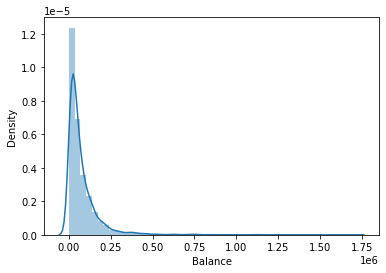

In [246]:
sns.distplot(df['Balance'])

C:\Users\aravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bonus_miles', ylabel='Density'>

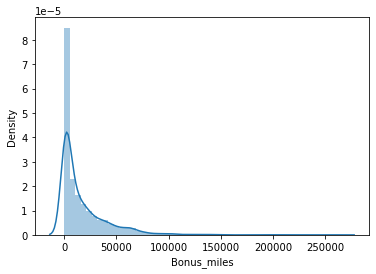

In [248]:
sns.distplot(df['Bonus_miles'])

In [57]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [172]:
# Creating a DataFrame without ID & Award columns for implementing clustering 
df1=df.iloc[:, 1:11]
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [59]:
#Hierachical Clustering

In [167]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [168]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [169]:
# Normalized data frame (considering the numerical part of data)
df1_norm = norm_func(df1.iloc[:,:])

In [170]:
df1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


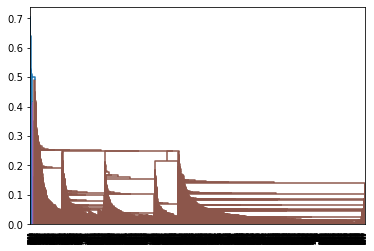

In [171]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df1_norm, method='single'))

In [173]:
# create clusters
hc = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage = 'single')

In [174]:
# save clusters for chart
y_hc_labels = hc.fit_predict(df1_norm)
Clusters=pd.DataFrame(y_hc_labels,columns=['Clusters'])

In [235]:
df1_norm['h_clusterid'] = hc.labels_

hierarchy_labels=hc.labels_
hierarchy_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
df1_norm['h_clusterid'].info

<bound method Series.info of 0       0
1       0
2       0
3       0
4       0
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Name: h_clusterid, Length: 3999, dtype: int64>

In [177]:
Clusters['Clusters'].unique()

array([0, 1, 8, 9, 2, 6, 5, 3, 7, 4], dtype=int64)

In [178]:
df1_norm['h_clusterid'].value_counts()

0    3948
1      27
8      15
2       2
3       2
9       1
6       1
5       1
7       1
4       1
Name: h_clusterid, dtype: int64

In [179]:
df['Clusters']=Clusters.iloc[:,0]

In [114]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# Calculating Silhouette Score for Hierarchical Clustering

In [236]:
Sil_score_hierarchy=silhouette_score(df1_norm,hierarchy_labels)
Sil_score_hierarchy

0.5438738551672688

# Building KMeans Clustering model

In [123]:
from sklearn.cluster import KMeans

In [181]:
df_kmeans=df1.iloc[:,:]
df_kmeans.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [182]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_kmeans)
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [183]:
len(scaled_df)

3999

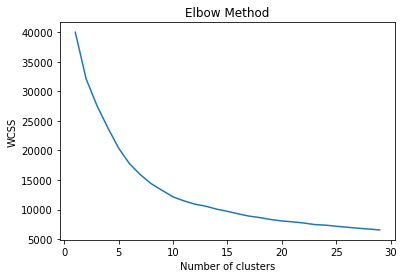

In [184]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [185]:
# Choosing the number of clusters with the help of Elbow method
kmeans_clustering=KMeans(n_clusters=10, random_state=42)

In [186]:
kmeans_clustering.fit(scaled_df)

KMeans(n_clusters=10, random_state=42)

In [229]:
kmeans_labels=kmeans_clustering.labels_
kmeans_labels

array([1, 1, 1, ..., 5, 8, 8])

In [189]:
df['kmeans_clusterid']=kmeans_clustering.labels_

In [190]:
kmeans_clustering.cluster_centers_

array([[ 5.79331285e-01, -8.10238771e-02,  1.73277635e+00,
        -9.82418871e-02, -5.25419861e-02,  1.66936035e+00,
         9.31933944e-01, -5.81293769e-02, -5.11384439e-02,
         6.25336730e-01],
       [-2.05587151e-01, -1.08115682e-01, -6.89606560e-01,
        -9.82418871e-02, -5.75923157e-02, -5.49916050e-01,
        -5.91893138e-01, -1.90946437e-01, -2.00506885e-01,
         8.18190813e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.24639805e-02],
       [ 9.04425647e-01,  6.89601538e-01,  2.90499661e-01,
        -9.82418871e-02, -6.27665798e-02,  1.07398045e+00,
         2.79127304e+00,  6.87710931e+00,  6.58574903e+00,
         3.52262781e-02],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.

In [191]:
df.groupby('kmeans_clusterid').agg(['mean']).reset_index()

,kmeans_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1292.307385,131976.522954,81.437126,4.445110,1.000000,1.001996,57456.473054,20.550898,378.672655,1.179641,5409.802395,0.640719,0.009980
1,1,1054.750760,52849.195542,60.663627,1.110436,1.000000,1.001013,3862.702128,5.915907,190.574468,0.608916,5813.944276,0.269504,0.000000
2,2,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.558140
3,3,1938.918919,164734.027027,677.567568,2.459459,1.000000,1.000000,43079.270270,38.405405,10088.243243,26.351351,4191.297297,0.945946,0.405405
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,1.000000
5,5,2076.734475,70875.998929,36.821199,3.018201,1.000000,1.001071,21550.626338,17.057816,155.095289,0.444325,4012.014989,0.459315,0.000000
6,6,1994.680000,106190.840000,226.405714,1.737143,1.000000,1.000000,18613.645714,19.931429,3527.857143,10.297143,4200.331429,0.680000,0.000000
7,7,2080.963636,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273,0.000000
8,8,3117.492887,32519.086192,42.766527,1.054393,1.000000,1.000000,3012.484519,5.239331,130.840167,0.451883,2138.500418,0.175732,0.000000


In [192]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,kmeans_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,8
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,8
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,8


In [193]:
df['kmeans_clusterid'].value_counts()

8    1195
1     987
5     934
0     501
6     175
9      57
7      55
2      43
3      37
4      15
Name: kmeans_clusterid, dtype: int64

In [195]:
print(df['kmeans_clusterid'].value_counts(ascending=True))

4      15
3      37
2      43
7      55
9      57
6     175
0     501
5     934
1     987
8    1195
Name: kmeans_clusterid, dtype: int64


In [196]:
df_new=df[df['kmeans_clusterid']==9]

In [228]:
# 9th Cluster/label data 
df_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,kmeans_clusterid
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,0,9
72,74,550367,0,3,1,1,12500,13,50,1,7801,0,0,9
87,90,609477,0,3,1,1,21422,22,1200,8,6820,0,0,9
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,0,9
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,0,9
151,154,930410,0,5,1,1,211284,18,2250,6,7640,1,0,9
167,170,402874,0,5,1,1,74800,15,0,0,7582,1,0,9
175,178,451673,0,4,1,1,43533,19,900,4,7575,1,0,9
186,190,707079,0,4,1,1,57173,40,3450,12,7523,1,0,9
188,192,410795,0,5,1,1,73679,31,0,0,7514,0,0,9


# Calculating Silhouette Score for KMeans Clustering Model

In [233]:
Sil_score_kmeans=silhouette_score(scaled_df,kmeans_labels)
Sil_score_kmeans

0.27027753192987153

# Building DBSCAN clustering Model

In [163]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,kmeans_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1


In [198]:
df_db=df1.iloc[:,:]

In [199]:
df_db.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [200]:
array=df.values

In [201]:
array

array([[    1, 28143,     0, ...,     0,     0,     1],
       [    2, 19244,     0, ...,     0,     0,     1],
       [    3, 41354,     0, ...,     0,     0,     1],
       ...,
       [ 4019, 73597,     0, ...,     1,     0,     5],
       [ 4020, 54899,     0, ...,     0,     0,     8],
       [ 4021,  3016,     0, ...,     0,     0,     8]], dtype=int64)

In [202]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [203]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -8.54242288e-02, -1.07108531e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -8.54242288e-02, -1.07108531e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -8.54242288e-02, -1.07108531e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -8.54242288e-02,  2.05311965e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -8.54242288e-02,  1.16260992e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -8.54242288e-02,  1.16260992e+00]])

In [218]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [219]:
#Noisy samples are given the label -1.
label_data=dbscan.labels_

In [220]:
dbscan=pd.DataFrame(dbscan.labels_,columns=['cluster_dbscan'])

In [221]:
dbscan

,cluster_dbscan
0,0
1,0
2,0
3,0
4,-1
...,...
3994,9
3995,9
3996,3
3997,8


In [222]:
from sklearn.metrics import silhouette_score
%matplotlib inline

# Calculating Silhouette Score for DBSCAN clustering Model

In [232]:
Sil_score_dbscan=silhouette_score(X,label_data)
Sil_score_dbscan

0.1663679203260917

#  Conclusion

In [245]:
#Silhouette Score for three clustering models
Silhouette_score={'Model':['Hierarchical Clustering','KMeans Clustering','DBSCAN Clustering'], 'Silouette Score': [ Sil_score_hierarchy, Sil_score_kmeans, Sil_score_dbscan ]}
Silhouette_Score=pd.DataFrame(Silhouette_score)
Silhouette_Score

,Model,Silouette Score
0,Hierarchical Clustering,0.543874
1,KMeans Clustering,0.270278
2,DBSCAN Clustering,0.166368


# The best prediction model for the given data is hierarchical model, since the Silhouette Score is high for Hierarchical clsutering compare to KMeans, DBSCAN